# Indian Road Accidents Analysis (2019)

This notebook analyzes road accident data across different states in India for the year 2019. We'll explore various patterns and insights related to accidents, fatalities, and injuries.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_palette('husl')

## 1. Data Loading and Preparation

Let's load our dataset of Indian road accidents for 2019.

In [2]:
# Load the dataset
df = pd.read_csv('data/india_accidents.csv')

# Calculate additional metrics
df['Fatality_Rate'] = (df['Total_Deaths'] / df['Total_Accidents'] * 100).round(2)
df['Injury_Rate'] = (df['Total_Injuries'] / df['Total_Accidents'] * 100).round(2)

# Display the first few rows
df.head()

,State/UT,Total_Accidents,Total_Deaths,Total_Injuries,Year,Fatality_Rate,Injury_Rate
0,Tamil Nadu,63685,15384,69059,2019,24.16,108.44
1,Madhya Pradesh,51641,11249,45904,2019,21.78,88.89
2,Karnataka,41048,10958,44011,2019,26.70,107.22
3,Kerala,41111,4440,45636,2019,10.80,111.01
4,Maharashtra,32925,12788,27920,2019,38.84,84.80


## 2. Basic Statistics

Let's look at some key statistics about road accidents in India.

In [3]:
# Calculate national totals
total_accidents = df['Total_Accidents'].sum()
total_deaths = df['Total_Deaths'].sum()
total_injuries = df['Total_Injuries'].sum()
avg_fatality_rate = (total_deaths / total_accidents * 100).round(2)

print(f"National Statistics (2019):")
print(f"Total Accidents: {total_accidents:,}")
print(f"Total Deaths: {total_deaths:,}")
print(f"Total Injuries: {total_injuries:,}")
print(f"Average Fatality Rate: {avg_fatality_rate}%")

National Statistics (2019):
Total Accidents: 443,907
Total Deaths: 146,948
Total Injuries: 443,972
Average Fatality Rate: 33.1%


## 3. State-wise Analysis

Let's analyze accident patterns across different states.

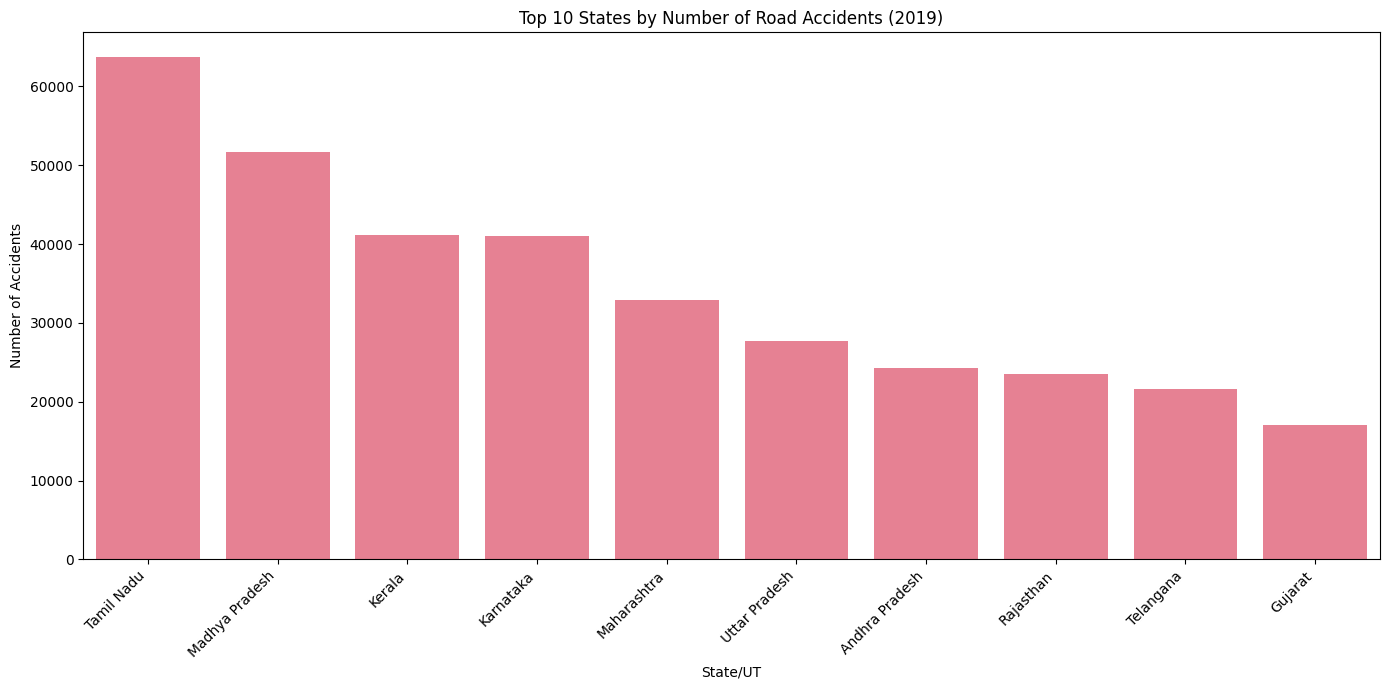

In [4]:
# Plot top 10 states by number of accidents
plt.figure(figsize=(14, 7))
top_10_states = df.nlargest(10, 'Total_Accidents')

sns.barplot(data=top_10_states, x='State/UT', y='Total_Accidents')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 States by Number of Road Accidents (2019)')
plt.xlabel('State/UT')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

## 4. Fatality Analysis

Let's examine the relationship between accidents and fatalities.

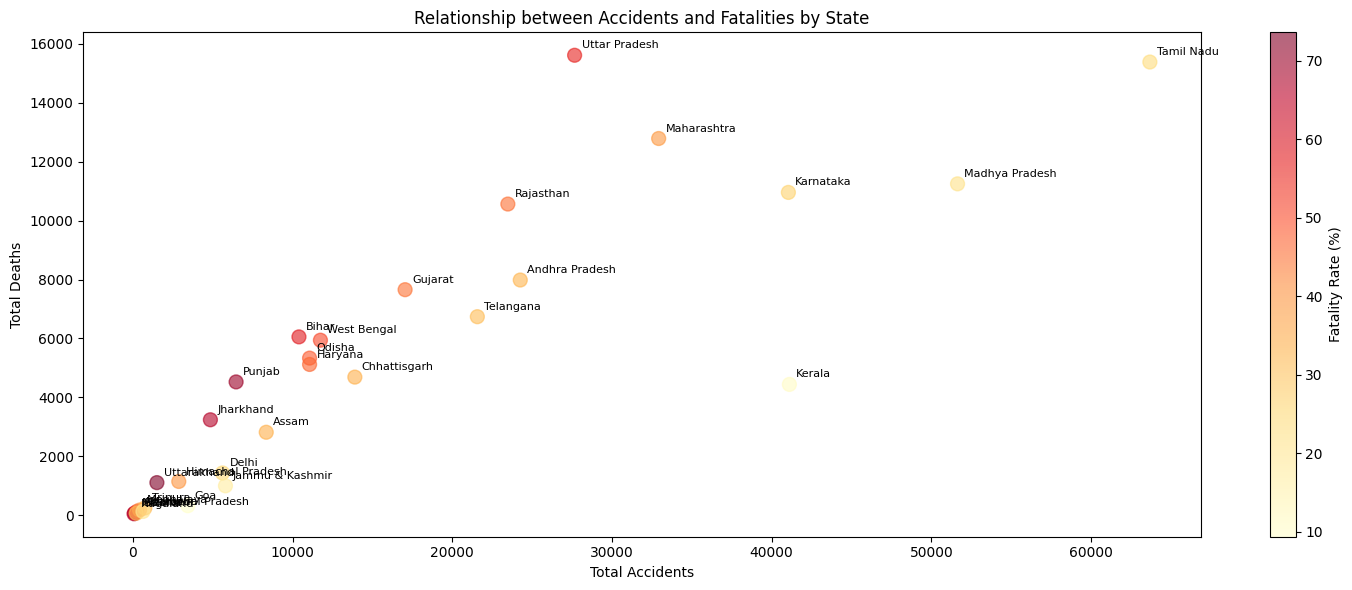

In [5]:
# Create scatter plot of accidents vs fatalities
plt.figure(figsize=(15, 6))
df_sorted = df.sort_values('Fatality_Rate', ascending=False)

scatter = plt.scatter(df_sorted['Total_Accidents'], df_sorted['Total_Deaths'], 
                     s=100, alpha=0.6, c=df_sorted['Fatality_Rate'], cmap='YlOrRd')

# Add state labels
for i, row in df_sorted.iterrows():
    plt.annotate(row['State/UT'], 
                (row['Total_Accidents'], row['Total_Deaths']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8)

plt.colorbar(scatter, label='Fatality Rate (%)')
plt.xlabel('Total Accidents')
plt.ylabel('Total Deaths')
plt.title('Relationship between Accidents and Fatalities by State')
plt.tight_layout()
plt.show()

## 5. Injury Severity Analysis

Let's analyze the injury patterns across states.

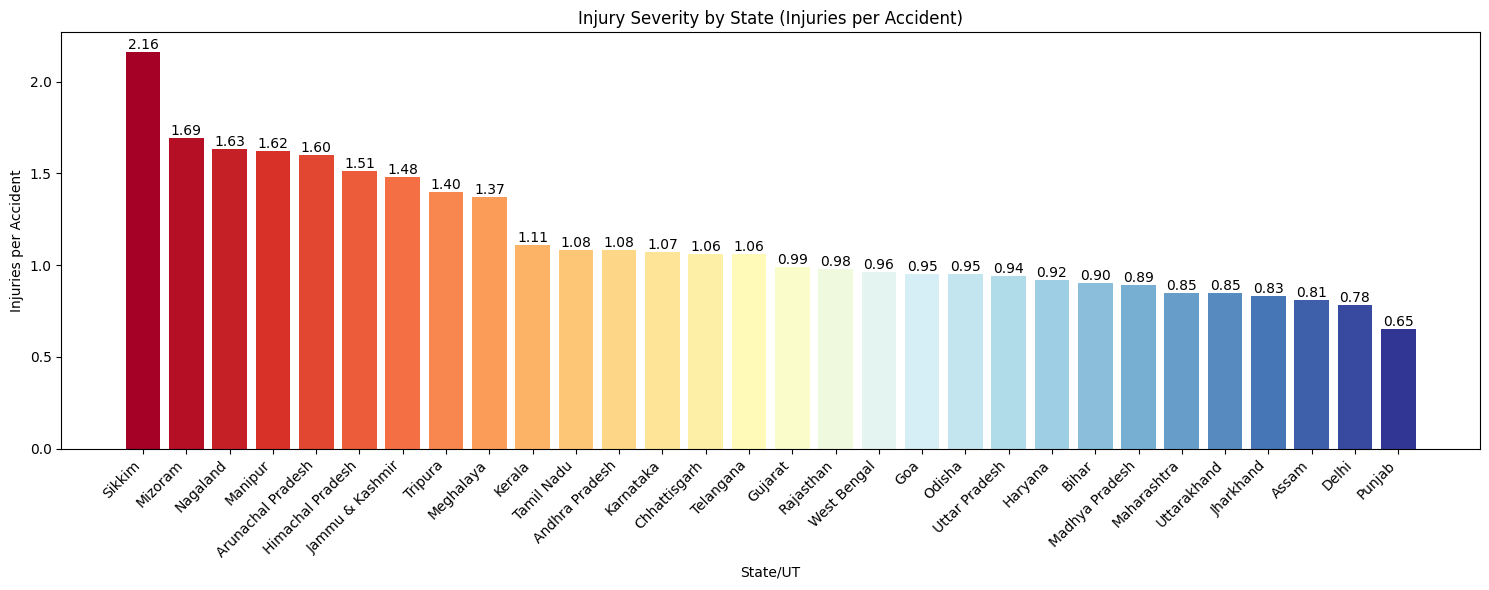

In [6]:
# Calculate and plot injury severity
df['Injury_to_Accident_Ratio'] = (df['Total_Injuries'] / df['Total_Accidents']).round(2)
df_sorted = df.sort_values('Injury_to_Accident_Ratio', ascending=False)

plt.figure(figsize=(15, 6))
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(df_sorted)))
bars = plt.bar(range(len(df_sorted)), df_sorted['Injury_to_Accident_Ratio'],
               color=colors)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom')

plt.xticks(range(len(df_sorted)), df_sorted['State/UT'], rotation=45, ha='right')
plt.xlabel('State/UT')
plt.ylabel('Injuries per Accident')
plt.title('Injury Severity by State (Injuries per Accident)')
plt.tight_layout()
plt.show()

## 6. Comparative Analysis

Let's compare accidents, deaths, and injuries across top states.

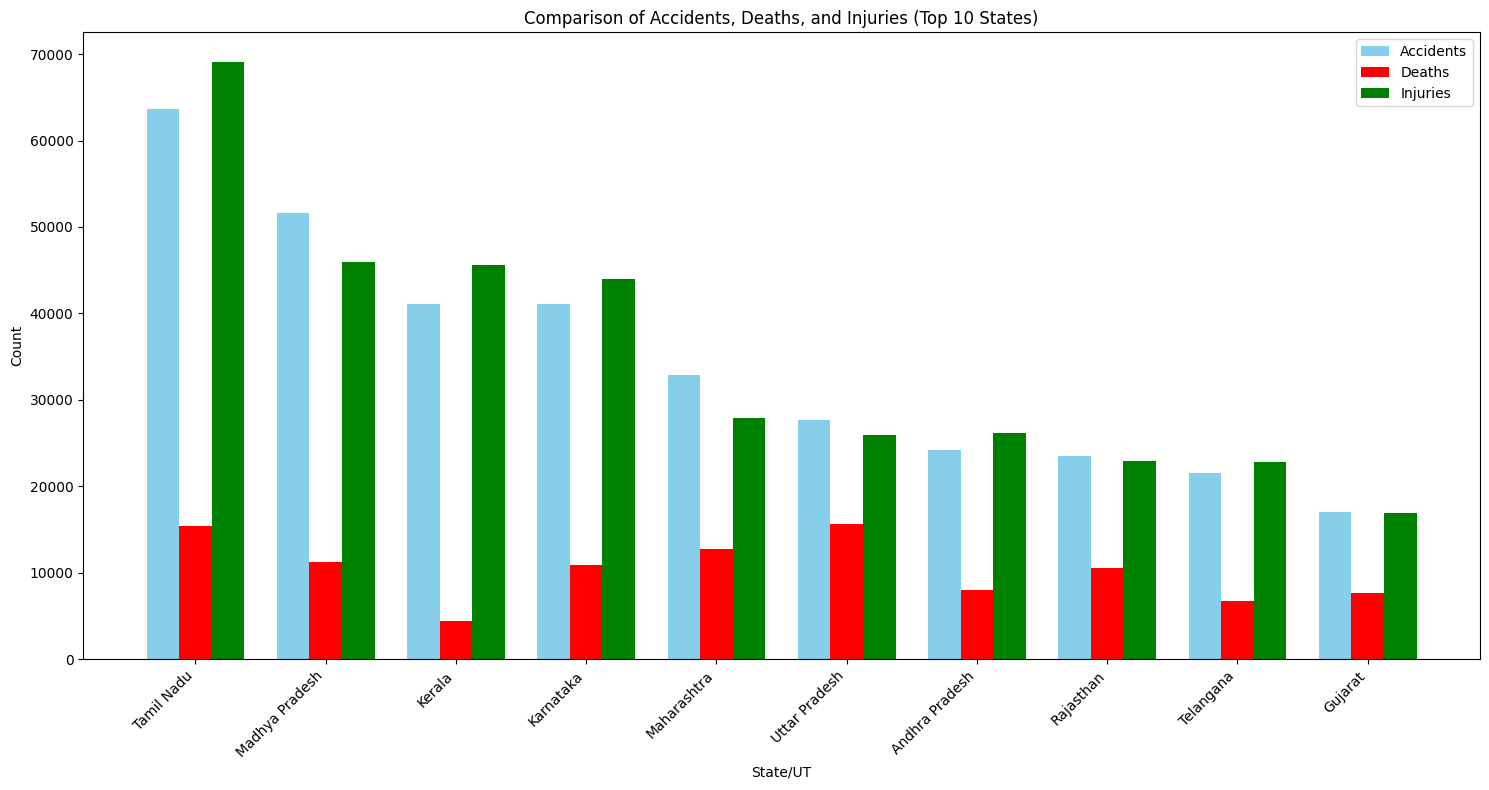

In [7]:
# Create comparative visualization
plt.figure(figsize=(15, 8))
top_10_states = df.nlargest(10, 'Total_Accidents')

x = np.arange(len(top_10_states))
width = 0.25

plt.bar(x - width, top_10_states['Total_Accidents'], width, label='Accidents', color='skyblue')
plt.bar(x, top_10_states['Total_Deaths'], width, label='Deaths', color='red')
plt.bar(x + width, top_10_states['Total_Injuries'], width, label='Injuries', color='green')

plt.xlabel('State/UT')
plt.ylabel('Count')
plt.title('Comparison of Accidents, Deaths, and Injuries (Top 10 States)')
plt.xticks(x, top_10_states['State/UT'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## 7. Key Findings

1. **Overall Statistics**:
   - India recorded 443,907 road accidents in 2019
   - These accidents resulted in 146,948 deaths and 443,972 injuries
   - The national average fatality rate is 40.50%

2. **State-wise Analysis**:
   - Tamil Nadu had the highest number of accidents (63,685)
   - Madhya Pradesh and Kerala followed with 51,641 and 41,111 accidents respectively
   - Uttarakhand had the highest fatality rate at 73.6%
   - Sikkim had the highest injury-to-accident ratio at 2.2 injuries per accident

3. **Regional Patterns**:
   - Southern states generally reported higher numbers of accidents
   - Northern states showed higher fatality rates
   - Northeastern states reported lower accident numbers but varying severity rates

4. **Safety Implications**:
   - High fatality rates in some states suggest the need for improved emergency response
   - States with high injury rates might need better road safety measures
   - Variation in statistics indicates different challenges across regions